# Laboratório 8: Tratamento HIV

### Referente ao capítulo 14 

Nesse laboratório vamos estudar a estratégia ótima no tratamento do vírus imunodeficiência humano (HIV). Consideraremos o sistema imunológico do indivíduo, onde é usada quimioterapia de inibidores da transcrição reversa, como, por exemplo, o AZT, que afeta a infectividade do vírus, dado que interrompem estágios chave do desenvolvimento. 

O tratamento reduz a infectividade do vírus até que ocorra resistência (tempo finito). Para medir o benefício do tratamento, mediremos o quanto ele repercute no aumento de células CD4+T. Seja $T$ e $T_i$  a concentração de células não infectadas e infectadas, respectivamente e $V(t)$ a concentração de vírus livres. Células serão geradas segundo a expressão $\frac{s}{1 + V(t)}$. O controle $u(t)$ é a força da quimioterapia, onde $u(t) = 0$ é terapia máxima e $u(t) = 1$ é sem terapia. 

|Parâmetro|Significado|
|---------|-----------|
|$r$|taxa de crescimento de células T|
|$k$|taxa de infecção|
|$T_{max}$|nível máximo de células|
|$m_1$|morte natural de células não infectadas|
|$m_2$|morte natural de células infectadas|
|$m_3$|morte natural de vírus livres|
|$N$|média de vírus produzidos antes da morte da célula|

O problema é, portanto, 

$$ \max_u \int_0^{t_{final}} AT(t) - (1 - u(t))^2 dt $$ 

$$\text{sujeito a  }T'(t) = \frac{s}{1 + V(t)} - m_1T(t) + rT(t)\left[1 - \frac{T(t) + T_i(t)}{T_{max}}\right] - u(t)kV(t)T(t) $$

$$ T_i'(t) = u(t)kV(t)T(t) - m_2T_i(t)$$

$$V'(t) = Nm_2T_i(t) - m_3V(t)$$

$$T(0) = T_0 > 0, T_i(0) = T_{i0} > 0, V(0) = V_0 > 0$$

$$0\leq u(t) \leq 1$$

## Condições Necessárias 

O Hamiltoniano de sistemas desse tipo são muito grandes e, portanto, não precisam ser descritos, dado que a intuição seja clara.

### Equação adjunta 

Sejam $\lambda_1(t),\lambda_2(t) \text{ e } \lambda_3(t)$ funções deriváveis por partes. Assim 
   
$\lambda_1'(t) = - \frac{\partial H}{\partial T} = -A - \lambda_1(t)[-m_1 + r\left(1 - \frac{T(t) - T_i(t)}{T_{max}}\right) - \frac{rT(t)}{T_{max}} - u(t)kV(t)] - \lambda_2(t)u(t)kV(t)$

$\lambda_2'(t) = - \frac{\partial H}{\partial T_i} = \lambda_1(t)\frac{rT(t)}{T_{max}} + \lambda_2(t)m_2 - \lambda_3(t)Nm_2$

$\lambda_3'(t) = - \frac{\partial H}{\partial I} = \lambda_1(t)\left[\frac{s}{(1 + V(t))^2} + u(t)kT(t)\right] - \lambda_2(t)u(t)kT(t) + \lambda_3(t)m_3$

### Condição de transversalidade 

$
\lambda_1(T) = \lambda_2(T) = \lambda_3(T) = 0
$

### Condição de otimalidade

$$
\frac{\partial H}{\partial u} = 2(1 - u(t)) - \lambda_1(t)kV(t)T(t) + \lambda_2(t)kV(t)T(t) 
$$

$\frac{\partial H}{\partial u} < 0 \Rightarrow u^*(t) = 0 \Rightarrow 2(1 - u(t)) - \lambda_1(t)kV(t)T(t) + \lambda_2(t)kV(t)T(t) < 0 \Rightarrow 2 < kV(t)T(t)[\lambda_1(t) - \lambda_2(t)]$

$$0 > \frac{1}{2}[kV(t)T(t)(\lambda_2(t) - \lambda_1(t)) + 2]$$

$\frac{\partial H}{\partial u} > 0 \Rightarrow u^*(t) = 1 \Rightarrow 2(1 - u(t)) - \lambda_1(t)kV(t)T(t) + \lambda_2(t)kV(t)T(t) > 0 \Rightarrow 0 > kV(t)T(t)[\lambda_1(t) - \lambda_2(t)]$ 

$$1 < \frac{1}{2}[kV(t)T(t)(\lambda_2(t) - \lambda_1(t)) + 2]$$

$\frac{\partial H}{\partial u} = 0 \Rightarrow 0 \leq u(t) \leq 1 \Rightarrow 2(1 - u(t)) - \lambda_1(t)kV(t)T(t) + \lambda_2(t)kV(t)T(t) = 0$ 

$$u^*(t) = \frac{1}{2}[kV(t)T(t)(\lambda_2(t) - \lambda_1(t)) + 2]$$

Portanto $u^*(t) =  \max\left\{0, \min\left\{\frac{1}{2}[kV(t)T(t)(\lambda_2(t) - \lambda_1(t)) + 2],1\right\}\right\}$

### Importanto as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

import sys  
sys.path.insert(0, '../pyscripts/')

from optimal_control_class import OptimalControl

Aqui podemos descrever as funções necessárias para a classe. Estamos lidando com variáveis multidimensionais no tempo. Portanto, vamos utilizar `numpy` como forma de escrita. Nessa escrita, cada coluna $i$ é um vetor correspondente ao estado $i$. Nesse caso teremos $T \to 0, T_i \to 1, V \to 2$. 

In [2]:
parameters = {'k': None, 'r': None, 'm1': None, 'm2': None, 'm3': None, 'N': None, 's': None, 'Tmax': None, 'A': None}

diff_state = lambda t, x, u, par: np.array([
    par['s']/(1 + x[2]) + x[0]*(-par['m1'] + par['r']*(1 - (x[0] + x[1])/par['Tmax']) - u[0]*par['k']*x[2]), 
    u[0]*par['k']*x[2]*x[0] - par['m2']*x[1], 
    par['N']*par['m2']*x[1] - par['m3']*x[2]
])

diff_lambda = lambda t, x, u, lambda_, par: np.array([
    -(par['A'] + lambda_[0]*(-par['m1'] + par['r']*(1 - (2*x[0] + x[1])/par['Tmax']) - u[0]*par['k']*x[2]) + \
          lambda_[1]*u[0]*par['k']*x[2]), 
    -(lambda_[0]*(-par['r']*x[0]/par['Tmax']) - lambda_[1]*par['m2'] + lambda_[2]*par['N']*par['m2']), 
    -(lambda_[0]*(-par['s']/((1+x[2])**2) - u[0]*par['k']*x[0]) + lambda_[1]*u[0]*par['k']*x[0] - lambda_[2]*par['m3'])
])

update_u = lambda t, x, lambda_, par: np.minimum(1.0, np.maximum(0.5*(par['k']*x[2]*x[0]*(lambda_[1] - lambda_[0]) + 2), 0.0))

## Aplicando a classe ao exemplo 

Vamos fazer algumas experimentações. Sinta-se livre para variar os parâmetros.

In [3]:
problem = OptimalControl(diff_state, diff_lambda, update_u, 
                         n_controls = 1, n_states = 3, 
                         bounds = [(0,1)])

In [4]:
x0 = np.array([800, 0.04, 1.5]) # T0, Ti0, V0 
Tfinal = 20
parameters['s'] = 10
parameters['m1'] = 0.02
parameters['m2'] = 0.5
parameters['m3'] = 4.4
parameters['r'] = 0.03
parameters['Tmax'] = 1500
parameters['k'] = 0.000024
parameters['N'] = 300
parameters['A'] = 0.05

Importante lembrar que esses gráficos são padrões e podem ser melhorados manualmente. 

In [5]:
t,x,u,lambda_ = problem.solve(x0, Tfinal, parameters)

Observamos que o tratamento inicia com dose máxima seguida de um decréscimo consistente. Isso logo aumenta o número de células T. 

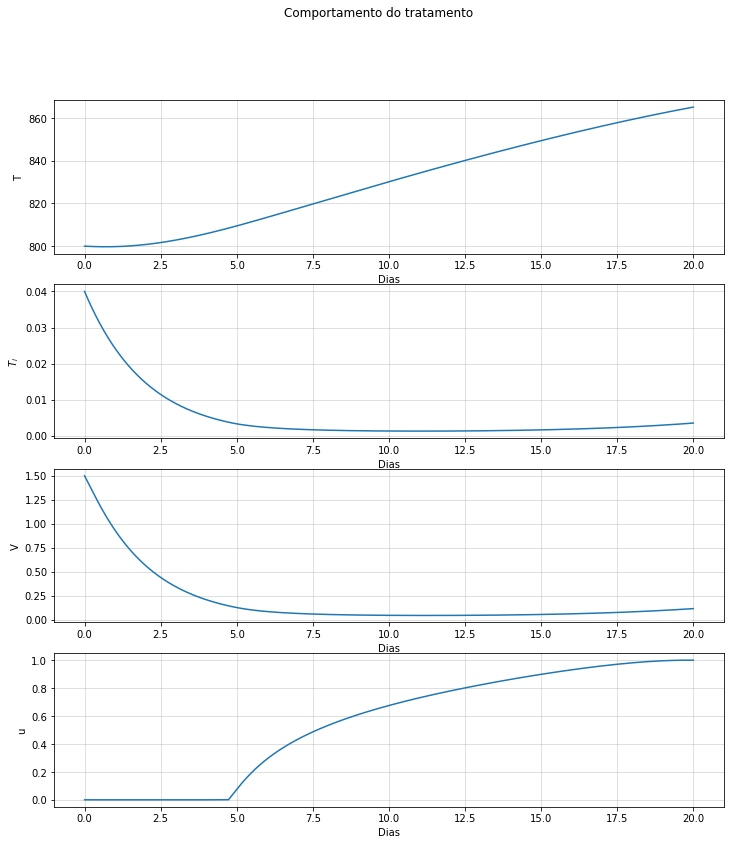

In [6]:
fig, ax = plt.subplots(4,1,figsize = (12, 13))
fig.suptitle('Comportamento do tratamento')
ax[0].plot(t, x[:,0])
ax[0].set_ylabel('T')
ax[1].plot(t, x[:,1])
ax[1].set_ylabel(r'$T_i$')
ax[2].plot(t, x[:,2])
ax[2].set_ylabel('V')
ax[3].plot(t, u)
ax[3].set_ylabel('u')
for i in range(4):
    ax[i].grid(alpha = 0.5)
    ax[i].set_xlabel('Dias')

Podemos aumentar o peso do custo do tratamento para obter um tratamento mais realista, já obter força máxima é quase impossível. Com um tratamento menor, o vírus livres se expandem mais e não atingem os níveis anteriores. 

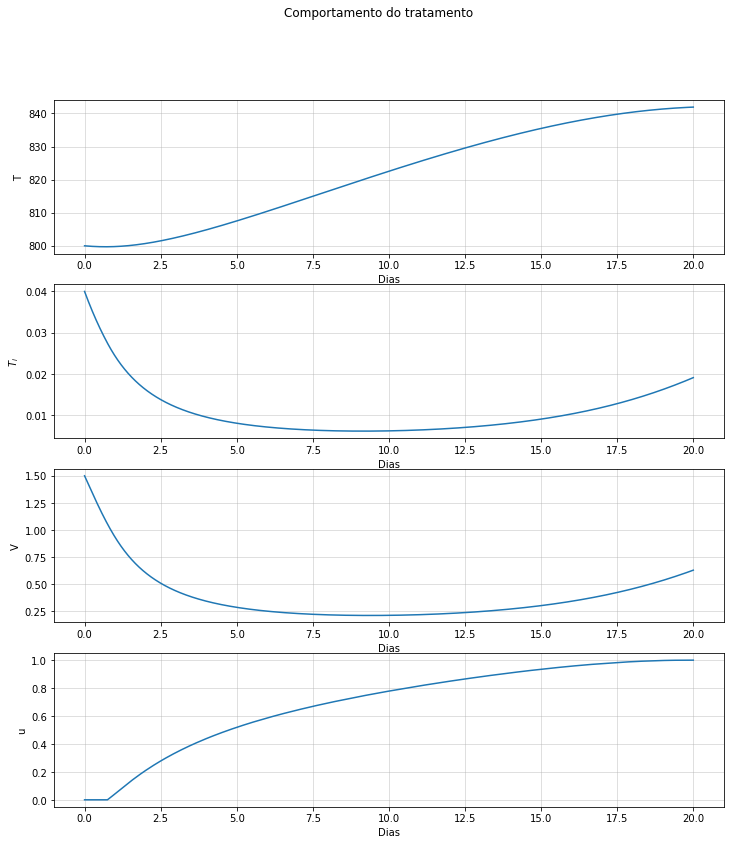

In [7]:
parameters['A'] = 0.01
t,x,u,lambda_ = problem.solve(x0, Tfinal, parameters)
fig, ax = plt.subplots(4,1,figsize = (12, 13))
fig.suptitle('Comportamento do tratamento')
ax[0].plot(t, x[:,0])
ax[0].set_ylabel('T')
ax[1].plot(t, x[:,1])
ax[1].set_ylabel(r'$T_i$')
ax[2].plot(t, x[:,2])
ax[2].set_ylabel('V')
ax[3].plot(t, u)
ax[3].set_ylabel('u')
for i in range(4):
    ax[i].grid(alpha = 0.5)
    ax[i].set_xlabel('Dias')

Existem muitos parâmetros para serem testados, mas podemos comparar os controles utilizados para diferentes valores de $k$, isto é, variar a transmissibilidade do vírus. Isso é interessante, pois nas equações diferenciais, $u$ e $k$ estão sempre acompanhados. Como esperávamos, quanto menor o valor de $k$, menor a força necessária para controlar o vírus. 

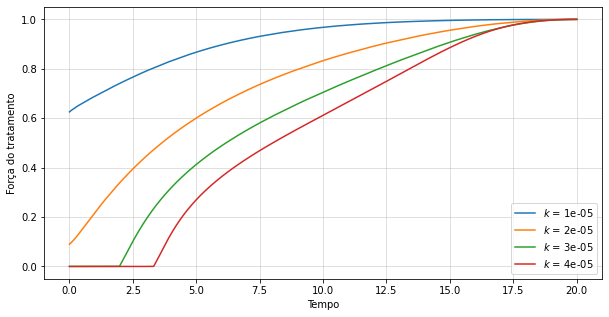

In [8]:
k_values = [0.00001, 0.00002, 0.00003, 0.00004]
u_values = []
for k in k_values:
    parameters['k'] = k
    _,_,u,_ = problem.solve(x0, Tfinal, parameters)
    u_values.append(u)

fig = plt.figure(figsize = (10,5))
plt.xlabel("Tempo")
plt.ylabel("Força do tratamento")
for i, k in enumerate(k_values):
    plt.plot(t, u_values[i],label = r'$k$ = {}'.format(k))
plt.legend()
plt.grid(alpha = 0.5)

## Experimentação 

Existem várias variações que podem ser feitas, portanto sugerimos que experimente esse modelo com variações em cada parâmetro. 

In [9]:
#t,x,u,lambda_ = problem.solve(x0, T, parameters)
#ax = problem.plotting(t,x,u,lambda_)
#ax[0].legend(['S','E','I','R'])
#plt.show()